In [2]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score

In [3]:
model = joblib.load("D:/Term7/Capstone-Project-I/src/models/best_ensemble_model.joblib")
X_test = pd.read_csv("../data/raw/X_test.csv")
y_test = pd.read_csv("../data/raw/y_test.csv")

In [4]:
ensemble_preds = model.predict(X_test)


In [5]:
ensemble_acc = accuracy_score(y_test, ensemble_preds)
print(f"Ensemble Accuracy: {ensemble_acc:.4f}")

Ensemble Accuracy: 0.8862


In [6]:
feature_encoders = joblib.load("D:/Term7/Capstone-Project-I/src/models/symptom_encoder.joblib")
target_encoder = joblib.load("D:/Term7/Capstone-Project-I/src/models/disease_encoder.joblib")

In [7]:
print(feature_encoders.classes_)

[' abdominal_pain' ' abnormal_menstruation' ' acidity'
 ' acute_liver_failure' ' altered_sensorium' ' anxiety' ' back_pain'
 ' belly_pain' ' blackheads' ' bladder_discomfort' ' blister'
 ' blood_in_sputum' ' bloody_stool' ' blurred_and_distorted_vision'
 ' breathlessness' ' brittle_nails' ' bruising' ' burning_micturition'
 ' chest_pain' ' chills' ' cold_hands_and_feets' ' coma' ' congestion'
 ' constipation' ' continuous_feel_of_urine' ' continuous_sneezing'
 ' cough' ' cramps' ' dark_urine' ' dehydration' ' depression'
 ' diarrhoea' ' dischromic _patches' ' distention_of_abdomen' ' dizziness'
 ' drying_and_tingling_lips' ' enlarged_thyroid' ' excessive_hunger'
 ' extra_marital_contacts' ' family_history' ' fast_heart_rate' ' fatigue'
 ' fluid_overload' ' foul_smell_of urine' ' headache' ' high_fever'
 ' hip_joint_pain' ' history_of_alcohol_consumption' ' increased_appetite'
 ' indigestion' ' inflammatory_nails' ' internal_itching'
 ' irregular_sugar_level' ' irritability' ' irritatio

In [8]:
decoded_colors = feature_encoders.inverse_transform(encoded_colors)
print("Decoded colors:", decoded_colors)

NameError: name 'encoded_colors' is not defined

In [ ]:
# for name, model in model.named_estimators_.items():
#     preds = model.predict(X_test)
#     acc = accuracy_score(y_test, preds)
#     print(f"{name} Accuracy: {acc:.4f}")

lr Accuracy: 0.6748
rf Accuracy: 0.9024
catboost Accuracy: 0.8862
lgb Accuracy: 0.9431
nb Accuracy: 0.5935
svm Accuracy: 0.7236


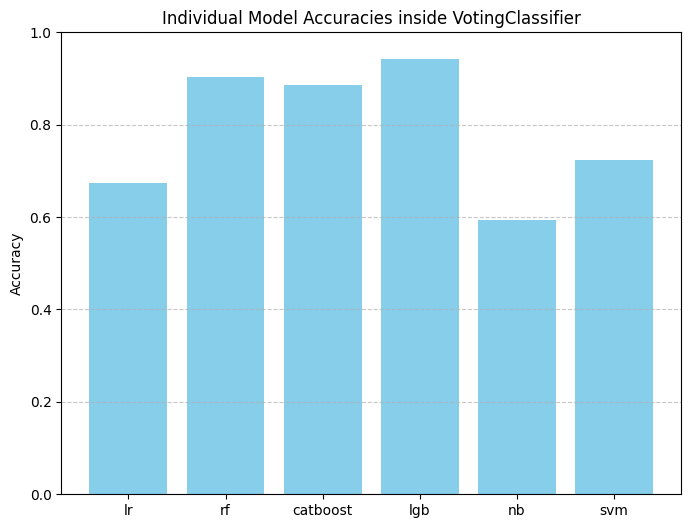

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store accuracies
model_accuracies = {}

# Loop through each individual model
for name, model in model.named_estimators_.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    model_accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Plotting
plt.figure(figsize=(8,6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.title('Individual Model Accuracies inside VotingClassifier')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
